In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import analysis_util
from inspect_util import Chunk
from inspect_util import remove_empty_lines
from inspect_util import normalize_lines

In [2]:
df = pd.read_csv('data/resolution_composition.csv')
print(len(df))
df.head()

13573


,chunk_id,v1_percentage,v2_percentage,intersection_percentage,chunk_composition,missing_v1_lines,missing_v2_lines,missing_v1_lines_perc,missing_v2_lines_perc,v1_size,v2_size
0,776662,0.42,0.92,0.33,v1 v2 (v1_2) v1 (v1_2) v1 v2,1,1,16.67,8.33,6,12
1,776782,0.57,0.75,0.32,v2 v1 (v1_2) v1 (v1_2) v1 (v1_2) v2 (v1_2) v2...,2,4,6.06,7.55,33,53
2,776793,0.75,0.25,0.00,v2 v1,1,0,25.00,0.00,4,1
3,776828,0.33,0.67,0.00,v2 v1 v2,2,0,66.67,0.00,3,2
4,776863,0.25,0.75,0.00,v2 v1,0,1,0.00,25.00,1,4


In [3]:
df_po = pd.read_csv('data/partial_order_result.csv')
df = pd.merge(df, df_po, on='chunk_id', how='inner', suffixes=('', ''))
df.head()

,chunk_id,v1_percentage,v2_percentage,intersection_percentage,chunk_composition,missing_v1_lines,missing_v2_lines,missing_v1_lines_perc,missing_v2_lines_perc,v1_size,v2_size,partial_order,chunk_size,resolution_size
0,776662,0.42,0.92,0.33,v1 v2 (v1_2) v1 (v1_2) v1 v2,1,1,16.67,8.33,6,12,True,25,12
1,776782,0.57,0.75,0.32,v2 v1 (v1_2) v1 (v1_2) v1 (v1_2) v2 (v1_2) v2...,2,4,6.06,7.55,33,53,True,121,101
2,776793,0.75,0.25,0.00,v2 v1,1,0,25.00,0.00,4,1,True,13,5
3,776828,0.33,0.67,0.00,v2 v1 v2,2,0,66.67,0.00,3,2,True,12,3
4,776863,0.25,0.75,0.00,v2 v1,0,1,0.00,25.00,1,4,True,13,5


In [4]:
malformed_chunks = pd.read_csv('data/malformed_chunks.csv')
malformed_chunks = malformed_chunks['chunk_id'].unique()
print(f'Removing {len(malformed_chunks)} malformed chunks')
df = df[~df['chunk_id'].isin(malformed_chunks)]
print(f'Total number of chunks: {len(df)}')

Removing 264 malformed chunks
Total number of chunks: 13309


In [5]:
# remove imprecise resolutions
df = df[df['v1_percentage']!= -1]
print(len(df))

10726


In [6]:
df.describe()

,chunk_id,v1_percentage,v2_percentage,intersection_percentage,missing_v1_lines,missing_v2_lines,missing_v1_lines_perc,missing_v2_lines_perc,v1_size,v2_size,chunk_size,resolution_size
count,1.072600e+04,10726.000000,10726.000000,10726.000000,10726.000000,10726.000000,10726.000000,10726.000000,10726.000000,10726.000000,10726.000000,10726.000000
mean,1.112637e+06,0.554077,0.532096,0.086037,1.786407,2.194387,32.210539,36.544740,6.668842,6.886537,22.008111,8.379079
std,2.206786e+05,0.319618,0.321639,0.197732,6.677797,10.272872,29.916529,31.037321,29.755920,32.439524,66.856653,35.503146
min,7.766620e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,1.000000
25%,9.467838e+05,0.330000,0.330000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,11.000000,2.000000
50%,1.079836e+06,0.500000,0.500000,0.000000,1.000000,1.000000,33.330000,40.000000,2.000000,3.000000,13.000000,3.000000
75%,1.293377e+06,0.810000,0.800000,0.000000,1.000000,2.000000,50.000000,50.000000,5.000000,5.000000,19.000000,7.000000
max,1.658666e+06,1.000000,1.000000,1.000000,353.000000,689.000000,100.000000,100.000000,1352.000000,1402.000000,2923.000000,1557.000000


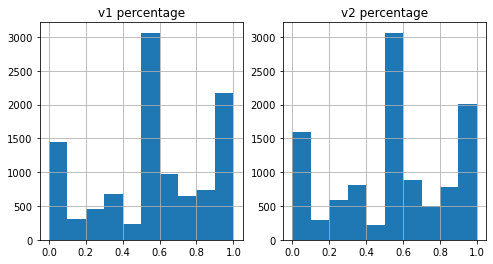

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
df['v1_percentage'].hist(ax=ax[0])
df['v2_percentage'].hist(ax=ax[1])
ax[0].set_title('v1 percentage')
ax[1].set_title('v2 percentage')
plt.show()


<AxesSubplot:>

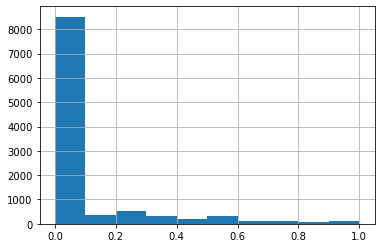

In [8]:
df['intersection_percentage'].hist()

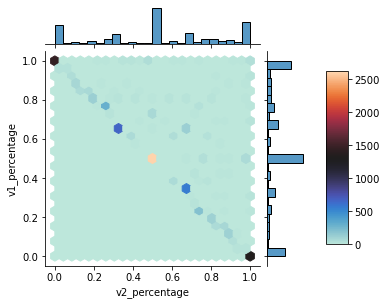

In [9]:
x = df['v2_percentage']
y = df['v1_percentage']

p1 = sns.jointplot(x=x, y=y, kind='hex', cmap='icefire')
plt.subplots_adjust(left=0.2, right=0.8, top=0.8, bottom=0.2)  # shrink fig so cbar is visible

cbar_ax = p1.fig.add_axes([.85, .25, .05, .4])  # x, y, width, height
plt.colorbar(cax=cbar_ax)
plt.show()

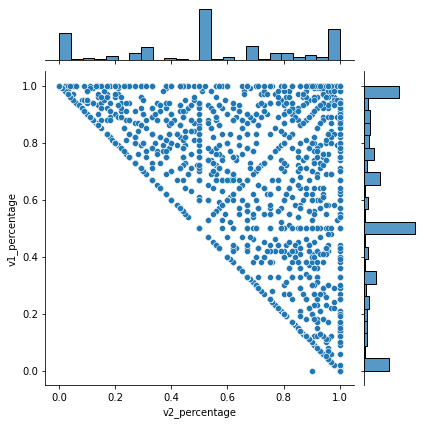

In [10]:
x = df['v2_percentage']
y = df['v1_percentage']
sns.jointplot(x=x, y=y, kind='scatter', cmap='BuPu')
plt.show()

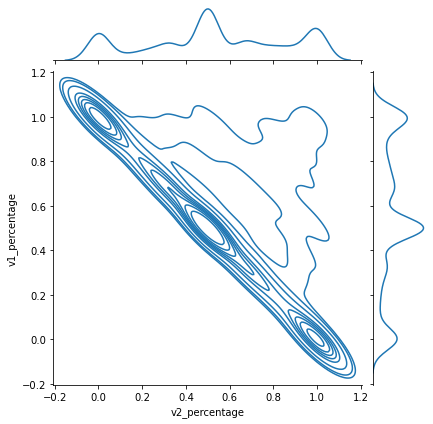

In [11]:
x = df['v2_percentage']
y = df['v1_percentage']
sns.jointplot(x=x, y=y, kind='kde')
plt.show()

In [12]:
v1v2 = analysis_util.get_chunk_composition_pattern_data('v1 v2', df)
v2v1 = analysis_util.get_chunk_composition_pattern_data('v2 v1', df)
v1_only = analysis_util.get_chunk_composition_pattern_data('v1', df)
v2_only = analysis_util.get_chunk_composition_pattern_data('v2', df)
v1v2v1 = analysis_util.get_chunk_composition_pattern_data('v1 v2 v1', df)
v2v1v2 = analysis_util.get_chunk_composition_pattern_data('v2 v1 v2', df)
no_alternation = len(v1v2) + len(v2v1)
some_alternation = len(v1v2v1) + len(v2v1v2)
print(f'Only v1 lines: {len(v1_only)} ({(len(v1_only)/len(df)*100):.2f}%)')
print(f'Only v2 lines: {len(v2_only)} ({(len(v2_only)/len(df)*100):.2f}%)')
print(f'No alternation (v1v2): {len(v1v2)} ({(len(v1v2)/len(df)*100):.2f}%)')
print(f'No alternation (v2v1): {len(v2v1)} ({(len(v2v1)/len(df)*100):.2f}%)')
# print(f'No alternation (aggregate): {no_alternation} ({(no_alternation/len(df)*100):.2f}%)')
print(f'Some alternation (v1v2v1 or v2v1v2): {some_alternation} ({(some_alternation/len(df)*100):.2f}%)')
easy_cases = no_alternation + some_alternation + len(v1_only) + len(v2_only)
remaining = len(df) - easy_cases

print('-------------')
print(f'Easier cases (all above): {easy_cases} ({(easy_cases/len(df)*100):.2f}%)')
print(f'Remaining (harder cases): {remaining} ({(remaining/len(df)*100):.2f}%)')



Only v1 lines: 1451 (13.53%)
Only v2 lines: 1341 (12.50%)
No alternation (v1v2): 2842 (26.50%)
No alternation (v2v1): 2189 (20.41%)
Some alternation (v1v2v1 or v2v1v2): 497 (4.63%)
-------------
Easier cases (all above): 8320 (77.57%)
Remaining (harder cases): 2406 (22.43%)


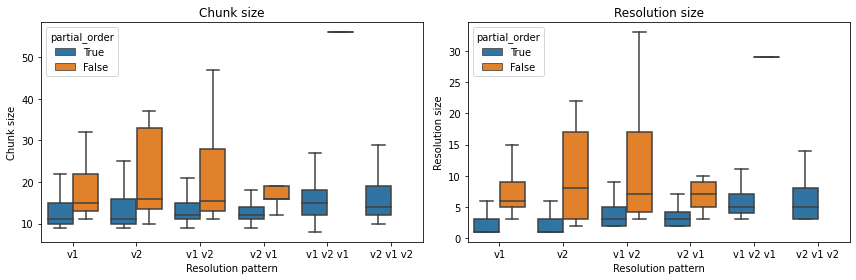

In [13]:
patterns = ['v1', 'v2', 'v1 v2', 'v2 v1', 'v1 v2 v1', 'v2 v1 v2']
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
analysis_util.get_chunk_composition_boxplot(df, patterns, 'chunk_size', 'Chunk size', ax[0])
analysis_util.get_chunk_composition_boxplot(df, patterns, 'resolution_size', 'Resolution size', ax[1])
ax[0].set_title('Chunk size')
ax[1].set_title('Resolution size')
fig.tight_layout()


### Distance from v1 or v2

On average, from the chunks that were resolved using only v1 or v2 lines, how far are they from the complete v1 or v2 solution?

In [14]:
v1_only.describe()

,chunk_id,v1_percentage,v2_percentage,intersection_percentage,missing_v1_lines,missing_v2_lines,missing_v1_lines_perc,missing_v2_lines_perc,v1_size,v2_size,chunk_size,resolution_size
count,1.451000e+03,1451.0,1451.0,1451.0,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000
mean,1.104880e+06,1.0,0.0,0.0,3.126120,1.060648,50.033687,45.485872,6.008270,1.060648,14.900069,3.272915
std,2.120303e+05,0.0,0.0,0.0,6.956115,2.884042,19.047188,49.812978,9.813077,2.884042,11.561604,6.187079
min,7.769150e+05,1.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,9.000000,1.000000
25%,9.617525e+05,1.0,0.0,0.0,1.000000,0.000000,40.000000,0.000000,2.000000,0.000000,10.000000,1.000000
50%,1.063791e+06,1.0,0.0,0.0,1.000000,0.000000,50.000000,0.000000,3.000000,0.000000,11.000000,1.000000
75%,1.272116e+06,1.0,0.0,0.0,2.000000,1.000000,62.500000,100.000000,5.000000,1.000000,15.000000,3.000000
max,1.658444e+06,1.0,0.0,0.0,157.000000,41.000000,98.330000,100.000000,161.000000,41.000000,171.000000,87.000000


For chunks that were resolved using only some lines of v1, they miss, on average, 3.12 or 50% of V1 lines. Interestingly, the average size of V2 in these chunks is 1 (min 0, max 41).

In [15]:
v2_only.describe()

,chunk_id,v1_percentage,v2_percentage,intersection_percentage,missing_v1_lines,missing_v2_lines,missing_v1_lines_perc,missing_v2_lines_perc,v1_size,v2_size,chunk_size,resolution_size
count,1.341000e+03,1341.0,1341.000000,1341.0,1341.000000,1341.000000,1341.000000,1341.000000,1341.000000,1341.000000,1341.000000,1341.000000
mean,1.105443e+06,0.0,0.999925,0.0,0.741238,4.627890,37.136465,52.712453,0.741238,7.893363,16.666667,3.730798
std,2.081648e+05,0.0,0.002731,0.0,2.098189,16.602133,48.334994,20.470934,2.098189,20.287996,22.029898,10.553058
min,7.770420e+05,0.0,0.900000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,9.000000,1.000000
25%,9.619860e+05,0.0,1.000000,0.0,0.000000,1.000000,0.000000,45.450000,0.000000,2.000000,10.000000,1.000000
50%,1.077603e+06,0.0,1.000000,0.0,0.000000,1.000000,0.000000,50.000000,0.000000,3.000000,11.000000,1.000000
75%,1.239417e+06,0.0,1.000000,0.0,1.000000,3.000000,100.000000,66.670000,1.000000,6.000000,16.000000,3.000000
max,1.658415e+06,0.0,1.000000,0.0,34.000000,478.000000,100.000000,99.170000,34.000000,484.000000,496.000000,305.000000


For chunks that were resolved using only some lines of v2, they miss, on average, 4.62 or 52% of V2 lines. Interestingly, as happened with v1_only, the average size of V1 in these chunks is 0.74 (min 0, max 34).

### Sample of v1_only chunks

In [16]:
sample_v1 = v1_only.sample(3, random_state = 42)
sample_v1.head()

,chunk_id,v1_percentage,v2_percentage,intersection_percentage,chunk_composition,missing_v1_lines,missing_v2_lines,missing_v1_lines_perc,missing_v2_lines_perc,v1_size,v2_size,partial_order,chunk_size,resolution_size
4916,993836,1.0,0.0,0.0,v1,7,2,53.85,100.0,13,2,True,22,6
6738,1075668,1.0,0.0,0.0,v1,2,0,50.00,0.0,4,0,True,11,2
503,790332,1.0,0.0,0.0,v1,1,2,2.70,100.0,37,2,True,54,44


### Chunk 1

In [17]:
chunk1 = Chunk(int(sample_v1.iloc[0]['chunk_id']))
print(chunk1.get_conflict_text())

import wyjc.runtime.BigRational;
import wyjvm.attributes.Code.Handler;
import wyjvm.io.BinaryOutputStream;
<<<<<<<
import wyjvm.lang.Bytecode;
import wyjvm.lang.Bytecode.Dup;
import wyjvm.lang.Bytecode.If;
import wyjvm.lang.Bytecode.Invoke;
import wyjvm.lang.Bytecode.Label;
import wyjvm.lang.Bytecode.Pop;
import wyjvm.lang.Bytecode.Throw;
import wyjvm.lang.BytecodeAttribute;
import wyjvm.lang.ClassFile;
import wyjvm.lang.JvmType;
import wyjvm.lang.JvmType.Function;
import wyjvm.lang.JvmTypes;
import wyjvm.lang.Modifier;
import wyjvm.lang.*;
import static wyjvm.lang.JvmTypes.*;
>>>>>>>

/**
 * The purpose of the class file builder is to construct a jvm class file from




In [18]:
print(chunk1.resolution)

import wyjc.runtime.BigRational;
import wyjvm.attributes.Code.Handler;
import wyjvm.io.BinaryOutputStream;
import wyjvm.lang.Bytecode;
import wyjvm.lang.BytecodeAttribute;
import wyjvm.lang.ClassFile;
import wyjvm.lang.JvmType;
import wyjvm.lang.JvmTypes;
import wyjvm.lang.Modifier;

/**
 * The purpose of the class file builder is to construct a jvm class file from



In [25]:
resolution = chunk1.get_clean_solution()
resolution = remove_empty_lines(resolution)
v1 = normalize_lines(chunk1.v1.splitlines())
v1 = remove_empty_lines(v1)
analysis_util.print_missing_lines(v1, resolution)

importwyjvm.lang.Bytecode.Dup;
importwyjvm.lang.Bytecode.If;
importwyjvm.lang.Bytecode.Invoke;
importwyjvm.lang.Bytecode.Label;
importwyjvm.lang.Bytecode.Pop;
importwyjvm.lang.Bytecode.Throw;
importwyjvm.lang.JvmType.Function;


### Chunk 2

In [19]:
chunk2 = Chunk(int(sample_v1.iloc[1]['chunk_id']))
print(chunk2.get_conflict_text())

import cucumber.runtime.HookDefinition;
import cucumber.runtime.StepDefinition;
import cucumber.runtime.java.test.Stepdefs;
<<<<<<<
import gherkin.formatter.Reporter;
import gherkin.formatter.model.DataTableRow;
import gherkin.formatter.model.DocString;
import gherkin.formatter.model.Step;
>>>>>>>
import org.junit.Test;

import java.util.ArrayList;




In [20]:
print(chunk2.resolution)

import cucumber.runtime.HookDefinition;
import cucumber.runtime.StepDefinition;
import cucumber.runtime.java.test.Stepdefs;
import gherkin.formatter.model.DataTableRow;
import gherkin.formatter.model.DocString;
import org.junit.Test;

import java.util.ArrayList;



In [26]:
resolution = chunk2.get_clean_solution()
resolution = remove_empty_lines(resolution)
v1 = normalize_lines(chunk2.v1.splitlines())
v1 = remove_empty_lines(v1)
analysis_util.print_missing_lines(v1, resolution)

importgherkin.formatter.Reporter;
importgherkin.formatter.model.Step;


### Chunk 3

In [21]:
chunk3 = Chunk(int(sample_v1.iloc[2]['chunk_id']))
print(chunk3.get_conflict_text())

        if ( ( script == null ) || "auto".equals(script) ) {
            script = CharUtilities.scriptTagFromCode ( CharUtilities.dominantScript ( ics ) );
        }
<<<<<<<
        if ( ( language == null ) || "none".equals(language) ) {
            language = "dflt";
        }

        // perform mapping (of chars to glyphs ... to glyphs ... to chars)
        CharSequence mcs = font.performSubstitution ( ics, script, language );

        // memoize mapping
        foText.addMapping ( s, e, mcs );

        // compute glyph position adjustment on (substituted) characters
        int[][] gpa;
        if ( font.performsPositioning() ) {
            gpa = font.performPositioning ( mcs, script, language );
        } else {
            gpa = null;
        }

        MinOptMax ipd = MinOptMax.ZERO;
        for ( int i = 0, n = mcs.length(); i < n; i++ ) {
            char c = mcs.charAt ( i );
            int  w = font.getCharWidth ( c );
            if ( gpa != null ) {
                w +=

In [22]:
print(chunk3.resolution)

        if ( ( script == null ) || "auto".equals(script) ) {
            script = CharUtilities.scriptTagFromCode ( CharUtilities.dominantScript ( ics ) );
        }
        if ( ( language == null ) || "none".equals(language) ) {
            language = "dflt";
        }

        // perform mapping (of chars to glyphs ... to glyphs ... to chars)
        CharSequence mcs = font.performSubstitution ( ics, script, language );

        // memoize mapping
        foText.addMapping ( s, e, mcs );

        // compute glyph position adjustment on (substituted) characters
        int[][] gpa;
        if ( font.performsPositioning() ) {
            gpa = font.performPositioning ( mcs, script, language );
        } else {
            gpa = null;
        }

        MinOptMax ipd = MinOptMax.ZERO;
        for ( int i = 0, n = mcs.length(); i < n; i++ ) {
            char c = mcs.charAt ( i );
            int  w = font.getCharWidth ( c );
            if ( gpa != null ) {
                w += gpa [ i

In [24]:
resolution = chunk3.get_clean_solution()
resolution = remove_empty_lines(resolution)
v1 = normalize_lines(chunk3.v1.splitlines())
v1 = remove_empty_lines(v1)
analysis_util.print_missing_lines(v1, resolution)

intwordLength=lastIndex-thisStart;


### Sample of v2_only chunks

In [27]:
sample_v2 = v2_only.sample(3, random_state = 42)
sample_v2.head()

,chunk_id,v1_percentage,v2_percentage,intersection_percentage,chunk_composition,missing_v1_lines,missing_v2_lines,missing_v1_lines_perc,missing_v2_lines_perc,v1_size,v2_size,partial_order,chunk_size,resolution_size
7521,1108730,0.0,1.0,0.0,v2,0,5,0.0,71.43,0,7,True,18,3
5682,1028798,0.0,1.0,0.0,v2,0,1,0.0,33.33,0,3,True,10,2
5898,1044342,0.0,1.0,0.0,v2,0,1,0.0,50.00,0,2,True,9,1


### Chunk 1

In [28]:
chunk1 = Chunk(int(sample_v2.iloc[0]['chunk_id']))
print(chunk1.get_conflict_text())

			RoomMaterialsDetailsPlace roomMaterialsDetailsPlace = (RoomMaterialsDetailsPlace) place;
			return new RoomMaterialsPlace(roomMaterialsDetailsPlace.getToken());
		}
<<<<<<<
		if (place instanceof AnamnesisCheckTitleDetailsPlace) {

			AnamnesisCheckTitleDetailsPlace AnamnesisCheckTitleDetailsPlace = (AnamnesisCheckTitleDetailsPlace) place;
			return new AnamnesisCheckPlace(
					AnamnesisCheckTitleDetailsPlace.getToken());
		}

	
		if (place instanceof RoleAssignmentPlace)
			return (RoleAssignmentPlace) place;
		
>>>>>>>
		//by spec role management]

		return null;




In [29]:
print(chunk1.resolution)

			RoomMaterialsDetailsPlace roomMaterialsDetailsPlace = (RoomMaterialsDetailsPlace) place;
			return new RoomMaterialsPlace(roomMaterialsDetailsPlace.getToken());
		}
	
		if (place instanceof RoleAssignmentPlace)
			return (RoleAssignmentPlace) place;
		//by spec role management]

		return null;



In [33]:
resolution = chunk1.get_clean_solution()
resolution = remove_empty_lines(resolution)
v2 = normalize_lines(chunk1.v2.splitlines())
v2 = remove_empty_lines(v2)
analysis_util.print_missing_lines(v2, resolution)

if(placeinstanceofAnamnesisCheckTitleDetailsPlace){
AnamnesisCheckTitleDetailsPlaceAnamnesisCheckTitleDetailsPlace=(AnamnesisCheckTitleDetailsPlace)place;
returnnewAnamnesisCheckPlace(
AnamnesisCheckTitleDetailsPlace.getToken());
}


### Chunk 2

In [34]:
chunk2 = Chunk(int(sample_v2.iloc[1]['chunk_id']))
print(chunk2.get_conflict_text())

import org.apache.commons.logging.Log;
import org.apache.commons.logging.LogFactory;
import org.apache.hadoop.conf.Configuration;
<<<<<<<
import org.apache.hadoop.io.RawComparator;
import org.apache.hadoop.mapred.RawKeyValueIterator;
import org.apache.hadoop.mapred.Task;
>>>>>>>
import org.apache.hadoop.mapreduce.Counter;
import org.apache.hadoop.mapreduce.InputSplit;
import org.apache.hadoop.mapreduce.Job;




In [35]:
print(chunk2.resolution)

import org.apache.commons.logging.Log;
import org.apache.commons.logging.LogFactory;
import org.apache.hadoop.conf.Configuration;
import org.apache.hadoop.io.RawComparator;
import org.apache.hadoop.mapred.RawKeyValueIterator;
import org.apache.hadoop.mapreduce.Counter;
import org.apache.hadoop.mapreduce.InputSplit;
import org.apache.hadoop.mapreduce.Job;



In [36]:
resolution = chunk2.get_clean_solution()
resolution = remove_empty_lines(resolution)
v2 = normalize_lines(chunk2.v2.splitlines())
v2 = remove_empty_lines(v2)
analysis_util.print_missing_lines(v2, resolution)

importorg.apache.hadoop.mapred.Task;


### Chunk 3

In [37]:
chunk3 = Chunk(int(sample_v2.iloc[2]['chunk_id']))
print(chunk3.get_conflict_text())

import org.eclipse.orion.internal.server.core.IWebResourceDecorator;
import org.eclipse.orion.internal.server.core.metastore.SimpleLinuxMetaStore;
import org.eclipse.orion.internal.server.servlets.hosting.ISiteHostingService;
<<<<<<<
import org.eclipse.orion.internal.server.servlets.project.ProjectDecorator;
import org.eclipse.orion.internal.server.servlets.workspace.CompatibilityMetaStore;
>>>>>>>
import org.eclipse.orion.internal.server.servlets.workspace.ProjectParentDecorator;
import org.eclipse.orion.internal.server.servlets.xfer.TransferResourceDecorator;
import org.eclipse.orion.server.core.OrionConfiguration;




In [38]:
print(chunk3.resolution)

import org.eclipse.orion.internal.server.core.IWebResourceDecorator;
import org.eclipse.orion.internal.server.core.metastore.SimpleLinuxMetaStore;
import org.eclipse.orion.internal.server.servlets.hosting.ISiteHostingService;
import org.eclipse.orion.internal.server.servlets.project.ProjectDecorator;
import org.eclipse.orion.internal.server.servlets.workspace.ProjectParentDecorator;
import org.eclipse.orion.internal.server.servlets.xfer.TransferResourceDecorator;
import org.eclipse.orion.server.core.OrionConfiguration;



In [39]:
resolution = chunk3.get_clean_solution()
resolution = remove_empty_lines(resolution)
v2 = normalize_lines(chunk3.v2.splitlines())
v2 = remove_empty_lines(v2)
analysis_util.print_missing_lines(v2, resolution)

importorg.eclipse.orion.internal.server.servlets.workspace.CompatibilityMetaStore;
